# Psychoinformatics - Week 16 (Exercises)
by your 吳由由 (b06902104@ntu.edu.tw)

## 1 Face Detection (3 points)
Please use one face detection method/package of your choice to see if you can detect the faces in the following two pictures:

<img src="https://carwad.net/sites/default/files/face-cartoon-107543-9090554.jpg" width=20%>
<img src="https://i.imgur.com/zESfT.jpg" width=20%>

If so, why? If not, why not? 

Remember to explore the model parameters to make your conclusions parameter-independent.

In [55]:
# Please write your codes here

%config IPCompleter.greedy=True 
%matplotlib inline
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import face_recognition
import requests

#download image

f = open('girl.jpg','wb')
f.write(requests.get('https://carwad.net/sites/default/files/face-cartoon-107543-9090554.jpg').content)
f.close()
f = open('sky.jpg','wb')
f.write(requests.get('https://i.imgur.com/zESfT.jpg').content)
f.close()

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 869, Left: 996, Bottom: 2019, Right: 2147


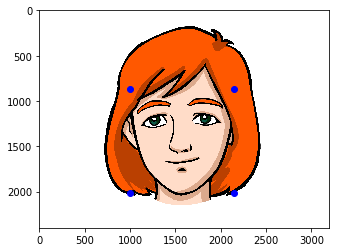

In [54]:

image = face_recognition.load_image_file('girl.jpg')
face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))
girl=cv2.imread('girl.jpg')
plt.imshow(cv2.cvtColor(girl,cv2.COLOR_BGR2RGB));
for face_location in face_locations:
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    plt.plot(left,top,"bo")
    plt.plot(right,top,"bo")
    plt.plot(left,bottom,"bo")
    plt.plot(right,bottom,"bo")

I found 0 face(s) in this photograph.


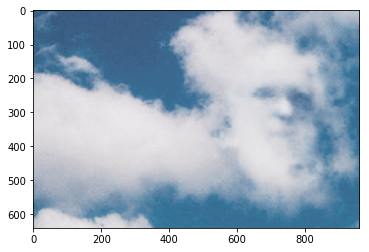

In [22]:
image = face_recognition.load_image_file('sky.jpg')
face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))
sky=cv2.imread('sky.jpg')
plt.imshow(cv2.cvtColor(sky,cv2.COLOR_BGR2RGB));
for face_location in face_locations:
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    plt.plot(top,left,"bo")
    plt.plot(top,right,"bo")
    plt.plot(bottom,left,"bo")
    plt.plot(bottom,right,"bo")

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 833, Left: 1077, Bottom: 1847, Right: 2091


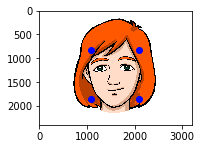

In [56]:
image = face_recognition.load_image_file('girl.jpg')
face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")

print("I found {} face(s) in this photograph.".format(len(face_locations)))
girl=cv2.imread('girl.jpg')
plt.subplot(1,2,1); 
plt.imshow(cv2.cvtColor(girl,cv2.COLOR_BGR2RGB));
for face_location in face_locations:
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    plt.plot(left,top,"bo")
    plt.plot(right,top,"bo")
    plt.plot(left,bottom,"bo")
    plt.plot(right,bottom,"bo")

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 157, Left: 611, Bottom: 393, Right: 847


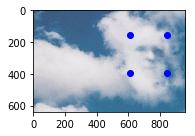

In [28]:
image = face_recognition.load_image_file('sky.jpg')
face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")

print("I found {} face(s) in this photograph.".format(len(face_locations)))
sky=cv2.imread('sky.jpg')
plt.subplot(1,2,2); 
plt.imshow(cv2.cvtColor(sky,cv2.COLOR_BGR2RGB));
for face_location in face_locations:
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    plt.plot(left,top,"bo")
    plt.plot(right,top,"bo")
    plt.plot(left,bottom,"bo")
    plt.plot(right,bottom,"bo")

我用python的face_recognition套件,當使用defaullt hog model時,卡通圖上就可以辨認出臉的位置了，但是天空找不到臉，(hog model比較簡單省時，正確率較低)
當使用cnn model時，執行時間很明顯地多了很多，不過在卡通和天空圖上都可以準確找到臉的位置(cnn 較複雜費時，但比較能辨認精確)

## 2 Audio Segementation (3 points) 
Please use one audio/speech segementation method of your choice (including your own codes) to calculate:

[1] the number of segments, and <br>
[2] the total speech duration of all the segments (seconds)

of each .wav file in https://ceiba.ntu.edu.tw/course/4671ea/content/speech.zip .

In the following example, there are 5 segements and the total speech duration is the sum of yellow(+blue) periods.

<img src="https://www.irit.fr/recherches/SAMOVA/assets/images/segmentation3.gif">

In [119]:
# Please write your codes here
%config IPCompleter.greedy=True 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from glob import glob

In [128]:
def split_audio(file,tt):
    y, sr = librosa.load(file,sr=None,mono=True)
    limit=max(y)/60
    t=len(y)/sr
    t=(int)(t*10)
    stop=0
    x=[]
    Y=[]
    count=0
    segment=0
    lasting=0
    s=(int)(sr/10)
    for i in range(t):
        sum=0.
        for j in range(s):
            sum+=abs(y[s*i+j])
        sum/=s
        if stop==0 and sum>limit:
            x.append(i/10)
            x.append(i/10)
            Y.append(0.3)
            Y.append(-0.3)
            stop=1
        elif stop==1 and sum < limit:
            lasting+=(i/10-x[len(x)-1])
            x.append(i/10)
            x.append(i/10)
            Y.append(0.3)
            Y.append(-0.3)
            segment+=1
            stop=0
    librosa.display.waveplot(y, sr);
    plt.bar(x,Y,width = 0.03,color='red')
    print("There are {} segment(s) in the speech.".format(segment))
    print("Total speech duration of all the segments is {}".format(lasting))

There are 2 segment(s) in the speech.
Total speech duration of all the segments is 1.9
There are 1 segment(s) in the speech.
Total speech duration of all the segments is 1.6999999999999997
There are 2 segment(s) in the speech.
Total speech duration of all the segments is 2.2
There are 1 segment(s) in the speech.
Total speech duration of all the segments is 2.4
There are 2 segment(s) in the speech.
Total speech duration of all the segments is 1.8000000000000003
There are 1 segment(s) in the speech.
Total speech duration of all the segments is 1.5999999999999999
There are 1 segment(s) in the speech.
Total speech duration of all the segments is 1.6999999999999997
There are 1 segment(s) in the speech.
Total speech duration of all the segments is 2.4000000000000004
There are 1 segment(s) in the speech.
Total speech duration of all the segments is 2.1
There are 1 segment(s) in the speech.
Total speech duration of all the segments is 1.2999999999999998
There are 1 segment(s) in the speech.
To

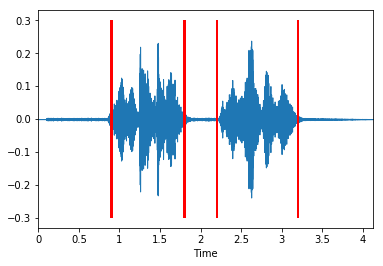

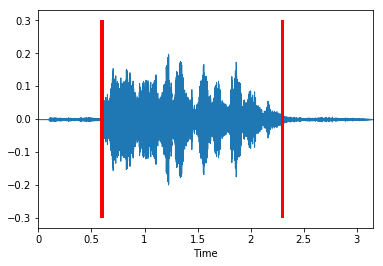

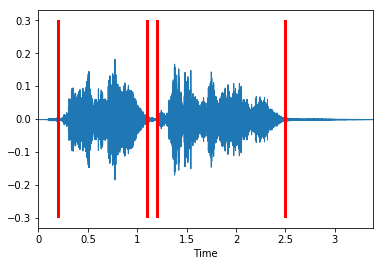

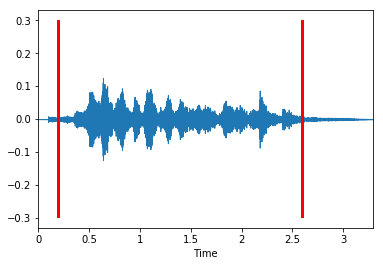

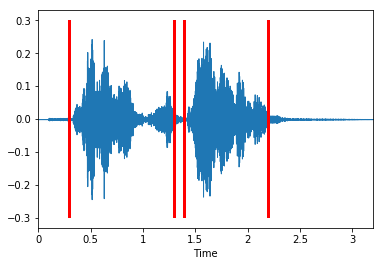

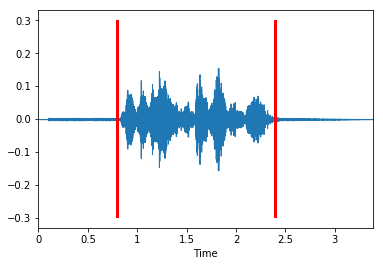

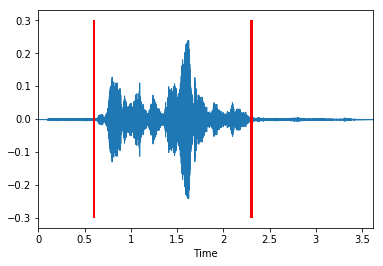

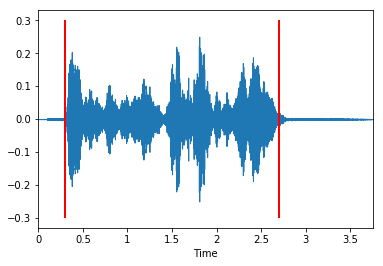

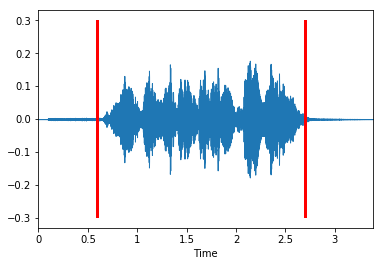

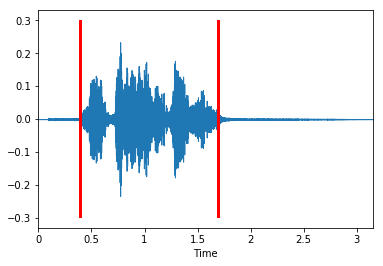

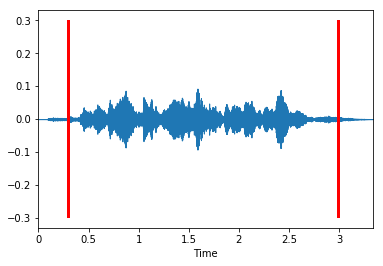

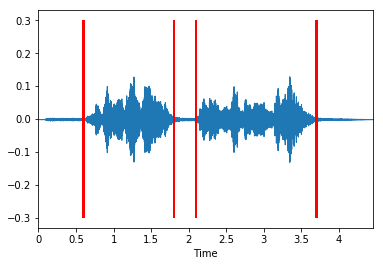

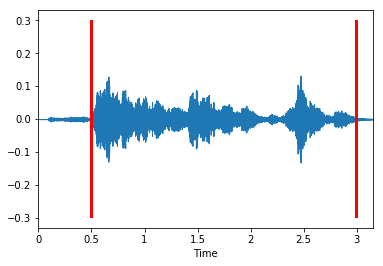

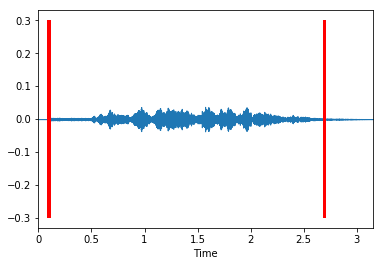

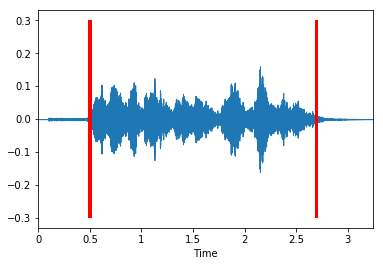

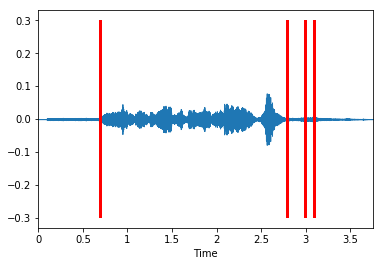

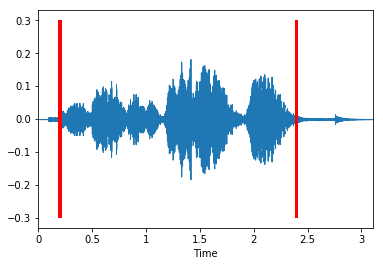

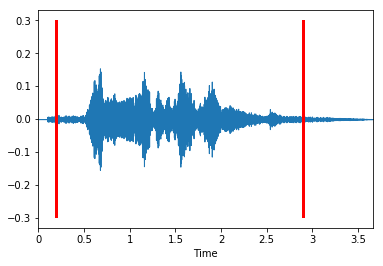

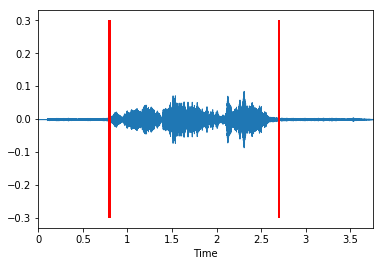

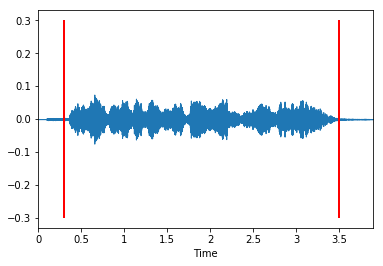

In [129]:
files=glob('speech/speech/anger/*.wav')
tt=1
for file in files:
    plt.figure(tt)
    split_audio(file,tt)
    tt+=1
files=glob('speech/speech/happy/*.wav')
for file in files:
    plt.figure(tt)
    split_audio(file,tt)
    tt+=1